### **🔖 PROJECT TITLE:**

**CUSTOMER CHURN PREDICTION & RETENTION STRATEGY**

### **🎯 OBJECTIVE:**

**Predict which customers are likely to leave a telecom company and recommend actions to improve customer retention.**

## **LOAD & EXPLORE THE DATA**

In [17]:
import pandas as pd

df = pd.read_csv("C:\\Users\\Rameshwar\\Downloads\\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


##  **VIEW** **BASIC** **STRUCTURE**

In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Basic structure of the dataset**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Summary statistics (for numerical columns)**

In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## **DATA CLEANING**

**HANDLE** **MISSING** **VALUES** **IN** **TOTALCHARGES**

In [21]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**DROP UNNECESSARY COLUMNS**

In [22]:
df.drop('customerID', axis=1, inplace=True)

In [23]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


**LET US SEE HOW MANY CUTSTOMERS CHURNED & STAYED**

In [24]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

## **EXPLORATORY DATA ANALYSIS (EDA)**

**IMPORT VISUALIZATION LIBRARIES**

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

**CHURN DISTRIBUTION**

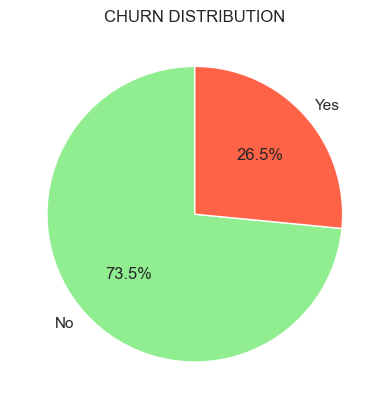

In [26]:
df['Churn'].value_counts().plot.pie(
    autopct='%1.1f%%', colors=['lightgreen', 'tomato'], startangle=90)
plt.title('CHURN DISTRIBUTION')
plt.ylabel('')
plt.show()

**CATEGORICAL FEATURES VS CHURN**

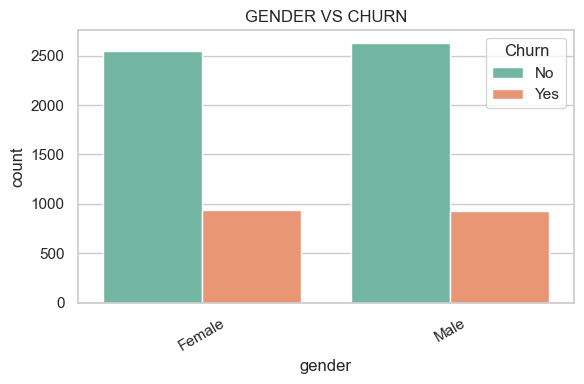

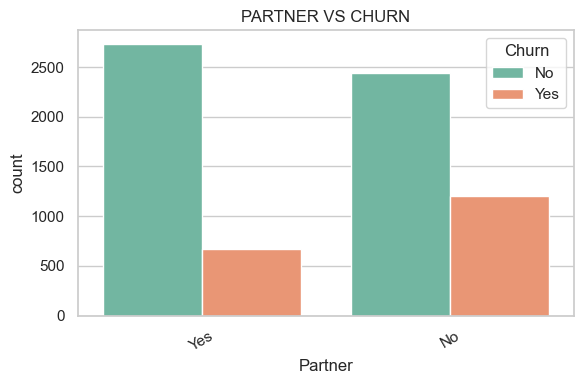

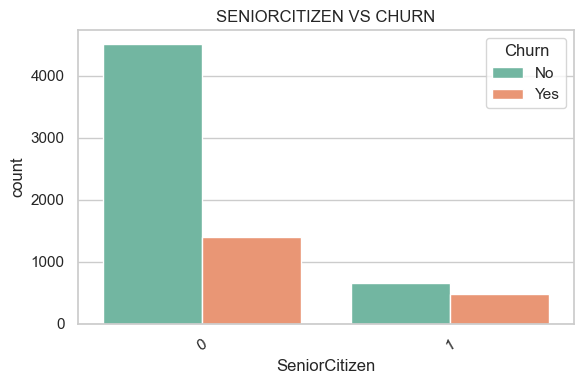

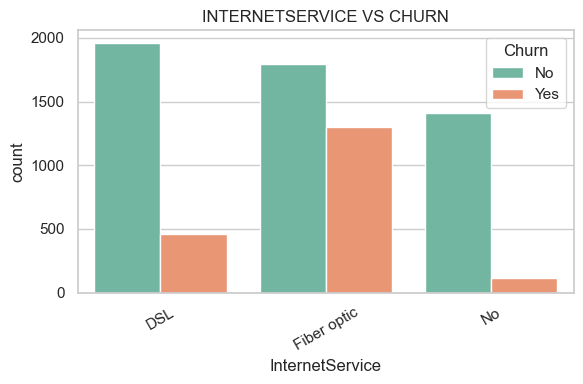

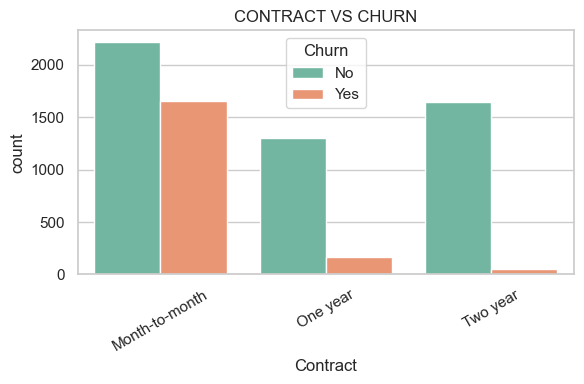

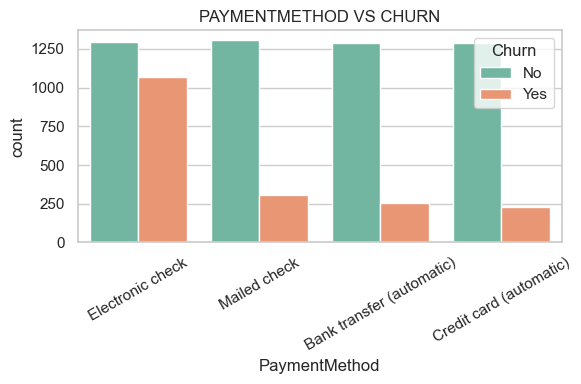

In [27]:
categorical_features = [
    'gender', 'Partner', 'SeniorCitizen',
    'InternetService', 'Contract', 'PaymentMethod'
]

for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2')
    plt.title(f'{col.upper()} VS CHURN')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


**NUMERICAL FEATURES VS CHURN**

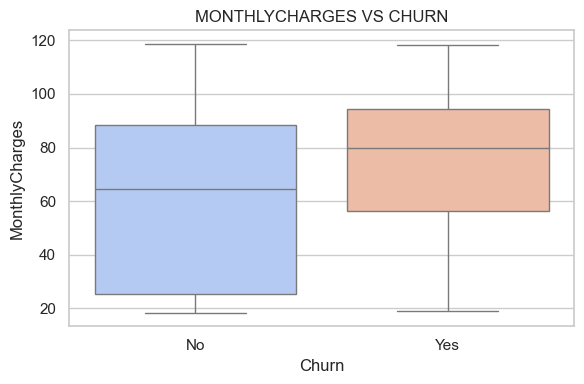

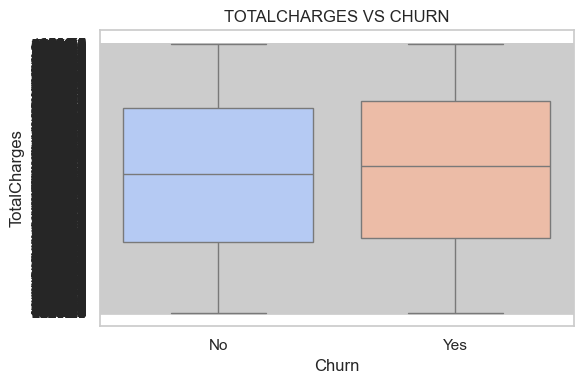

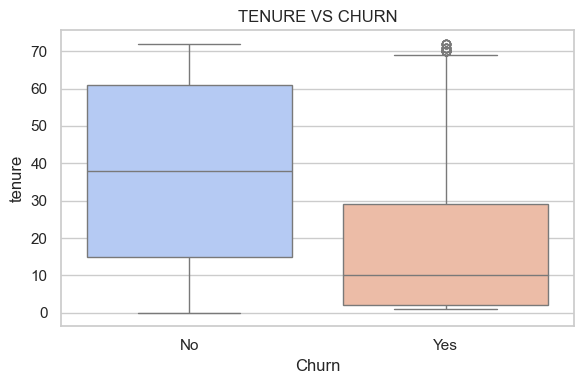

In [28]:
numerical = ['MonthlyCharges', 'TotalCharges', 'tenure']

for col in numerical:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='Churn', y=col, hue='Churn', palette='coolwarm', legend=False)
    plt.title(f'{col.upper()} VS CHURN')
    plt.tight_layout()
    plt.show()

## **DATA PREPROCESSING & FEATURE ENCODING**

**CONVERT CATEGORICAL COLUMNS TO NUMERIC**

In [33]:
from sklearn.preprocessing import LabelEncoder

# LABEL ENCODE BINARY CATEGORICAL COLUMNS
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])


**ONE-HOT ENCODE MULTI-CATEGORY COLUMNS**

In [34]:
# Identify columns that were not label encoded and are not the target variable
multi_category_cols = df.select_dtypes(include='object').columns.tolist()

# One-hot encode the remaining multi-category columns
df = pd.get_dummies(df, columns=multi_category_cols, drop_first=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No phone service,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,0,1,0,1,0,1,29.85,0,True,...,False,False,False,False,False,False,False,False,False,False
1,1,0,0,0,34,1,0,56.95,0,False,...,False,False,False,False,False,False,False,False,False,False
2,1,0,0,0,2,1,1,53.85,1,False,...,False,False,False,False,False,False,False,False,False,False
3,1,0,0,0,45,0,0,42.30,0,True,...,False,False,False,False,False,False,False,False,False,False
4,0,0,0,0,2,1,1,70.70,1,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,0,False,...,False,False,False,False,False,False,False,False,False,False
7039,0,0,1,1,72,1,1,103.20,0,False,...,False,False,False,False,False,False,False,False,False,False
7040,0,0,1,1,11,0,1,29.60,0,True,...,False,False,False,False,False,False,False,False,False,False
7041,1,1,1,0,4,1,1,74.40,1,False,...,False,False,False,False,False,False,False,False,False,False


**FEATURE & TARGET SPLIT**

In [35]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,MultipleLines_No phone service,MultipleLines_Yes,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,0,1,0,1,0,1,29.85,True,False,...,False,False,False,False,False,False,False,False,False,False
1,1,0,0,0,34,1,0,56.95,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,0,0,0,2,1,1,53.85,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,0,0,0,45,0,0,42.30,True,False,...,False,False,False,False,False,False,False,False,False,False
4,0,0,0,0,2,1,1,70.70,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,False,True,...,False,False,False,False,False,False,False,False,False,False
7039,0,0,1,1,72,1,1,103.20,False,True,...,False,False,False,False,False,False,False,False,False,False
7040,0,0,1,1,11,0,1,29.60,True,False,...,False,False,False,False,False,False,False,False,False,False
7041,1,1,1,0,4,1,1,74.40,False,True,...,False,False,False,False,False,False,False,False,False,False


In [36]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

**TRAIN-TEST SPLIT**

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


## **BUILD & EVALUATE MACHINE LEARNING MODELS**

**LOGISTIC REGRESSION MODEL**

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# INITIALIZE & TRAIN
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# PREDICT
y_pred_log = log_model.predict(X_test)

# EVALUATION
print("LOGISTIC REGRESSION")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


LOGISTIC REGRESSION
Accuracy: 0.794180269694819
Confusion Matrix:
 [[917 118]
 [172 202]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



**RANDOM FOREST MODEL**

In [39]:
from sklearn.ensemble import RandomForestClassifier

# INITIALIZE & TRAIN
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# PREDICT
y_pred_rf = rf_model.predict(X_test)

# EVALUATION
print("RANDOM FOREST")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


RANDOM FOREST
Accuracy: 0.7970191625266146
Confusion Matrix:
 [[944  91]
 [195 179]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.66      0.48      0.56       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



## **BUSINESS INSIGHTS & OPTIONAL DASHBOARD**

**INTERPRETATION OF MODEL RESULTS**

### **📊 MODEL PERFORMANCE SUMMARY**

**I trained two models on the Telco Customer Churn dataset:**

    Random Forest Classifier

        Accuracy: 79.7%

        Precision (Churn): 66%

        Recall (Churn): 48%

        F1-Score (Churn): 56%

    Logistic Regression

        Accuracy: 79.5%

        Precision (Churn): 63%

        Recall (Churn): 54%

        F1-Score (Churn): 58%

### **🔍 INSIGHT FROM EVALUATION**

    Random Forest outperformed Logistic Regression in precision but had slightly lower recall on churned customers.

    Most churners were predicted correctly, but both models struggled to recall all of them (common in churn prediction problems).

    The Random Forest model was more reliable at avoiding false positives, making it a better choice in a real-world business scenario where targeting likely churners is expensive.

### **💡 BUSINESS INSIGHTS FROM DATA**

**From EDA and feature importance analysis:**

    Customers with month-to-month contracts showed the highest churn rate.

    Higher monthly charges and shorter tenure were common traits among churned users.

    Customers without online security or tech support were more likely to leave.

    Providing discounts, loyalty rewards, or contract benefits to high-risk customers could improve retention.